In [1]:
from histogram_manager import HistogramManager

Welcome to JupyROOT 6.14/04


In [2]:
hm = HistogramManager("/project/def-psavard/ladamek/momentumvalidationoutput/test_Nov2/Output.root")

Initializing histogram manager on file /project/def-psavard/ladamek/momentumvalidationoutput/test_Nov2/Output.root
Found these channels in the file ['Data', 'MC']


In [3]:
dir(hm)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'channels',
 'filename',
 'get_histograms',
 'has_histogram',
 'histograms',
 'list_histograms']

In [7]:
hm.list_histograms("Mass")

listing all histograms:
Neg_CB_AverageMassProfile_0
Neg_CB_AverageMassProfile_1
Neg_CB_AverageMassProfile_10
Neg_CB_AverageMassProfile_11
Neg_CB_AverageMassProfile_2
Neg_CB_AverageMassProfile_3
Neg_CB_AverageMassProfile_4
Neg_CB_AverageMassProfile_5
Neg_CB_AverageMassProfile_6
Neg_CB_AverageMassProfile_7
Neg_CB_AverageMassProfile_8
Neg_CB_AverageMassProfile_9
Neg_CB_Mass_Histogram_0
Neg_CB_Mass_Histogram_1
Neg_CB_Mass_Histogram_10
Neg_CB_Mass_Histogram_11
Neg_CB_Mass_Histogram_2
Neg_CB_Mass_Histogram_3
Neg_CB_Mass_Histogram_4
Neg_CB_Mass_Histogram_5
Neg_CB_Mass_Histogram_6
Neg_CB_Mass_Histogram_7
Neg_CB_Mass_Histogram_8
Neg_CB_Mass_Histogram_9
Neg_ID_AverageMassProfile_0
Neg_ID_AverageMassProfile_1
Neg_ID_AverageMassProfile_10
Neg_ID_AverageMassProfile_11
Neg_ID_AverageMassProfile_2
Neg_ID_AverageMassProfile_3
Neg_ID_AverageMassProfile_4
Neg_ID_AverageMassProfile_5
Neg_ID_AverageMassProfile_6
Neg_ID_AverageMassProfile_7
Neg_ID_AverageMassProfile_8
Neg_ID_AverageMassProfile_9
Neg_ID_Mas

In [8]:
all_histograms = hm.list_histograms("Mass")

listing all histograms:
Neg_CB_AverageMassProfile_0
Neg_CB_AverageMassProfile_1
Neg_CB_AverageMassProfile_10
Neg_CB_AverageMassProfile_11
Neg_CB_AverageMassProfile_2
Neg_CB_AverageMassProfile_3
Neg_CB_AverageMassProfile_4
Neg_CB_AverageMassProfile_5
Neg_CB_AverageMassProfile_6
Neg_CB_AverageMassProfile_7
Neg_CB_AverageMassProfile_8
Neg_CB_AverageMassProfile_9
Neg_CB_Mass_Histogram_0
Neg_CB_Mass_Histogram_1
Neg_CB_Mass_Histogram_10
Neg_CB_Mass_Histogram_11
Neg_CB_Mass_Histogram_2
Neg_CB_Mass_Histogram_3
Neg_CB_Mass_Histogram_4
Neg_CB_Mass_Histogram_5
Neg_CB_Mass_Histogram_6
Neg_CB_Mass_Histogram_7
Neg_CB_Mass_Histogram_8
Neg_CB_Mass_Histogram_9
Neg_ID_AverageMassProfile_0
Neg_ID_AverageMassProfile_1
Neg_ID_AverageMassProfile_10
Neg_ID_AverageMassProfile_11
Neg_ID_AverageMassProfile_2
Neg_ID_AverageMassProfile_3
Neg_ID_AverageMassProfile_4
Neg_ID_AverageMassProfile_5
Neg_ID_AverageMassProfile_6
Neg_ID_AverageMassProfile_7
Neg_ID_AverageMassProfile_8
Neg_ID_AverageMassProfile_9
Neg_ID_Mas

In [11]:
Neg_histograms = ["Neg_ID_AverageMassProfile_{}".format(i) for i in range(0, 12)]
Pos_histograms = ["Pos_ID_AverageMassProfile_{}".format(i) for i in range(0, 12)]

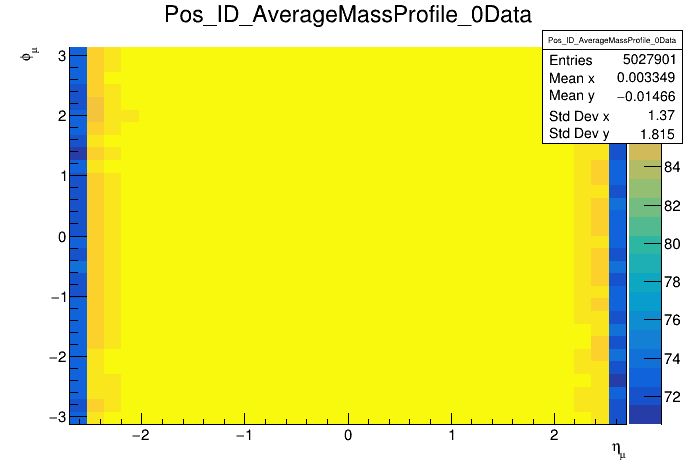

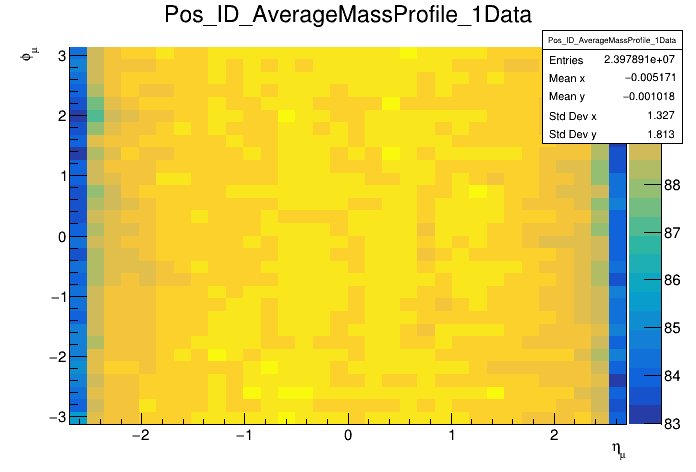

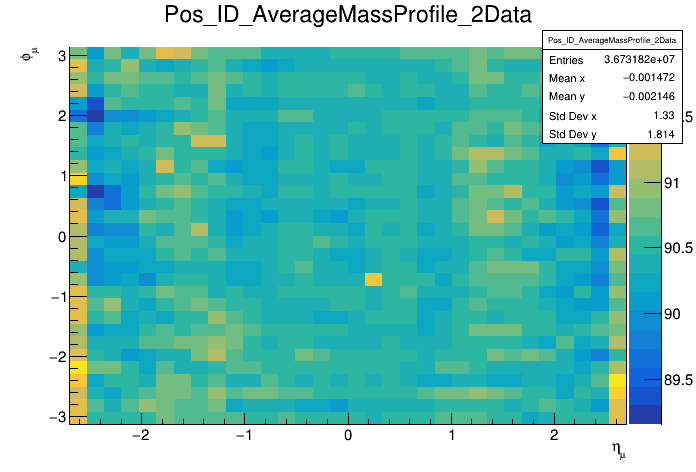

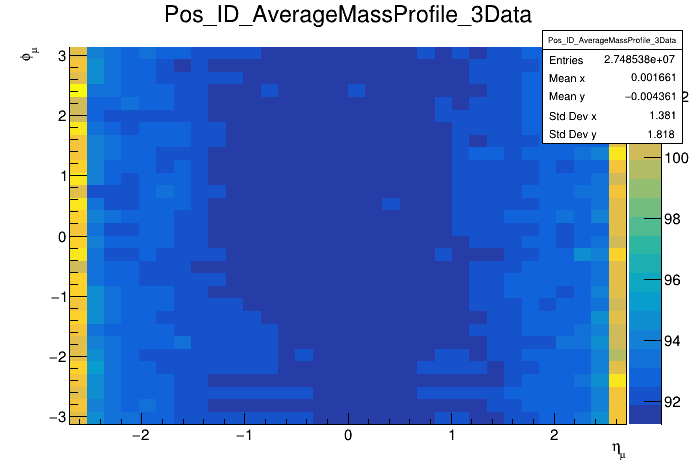

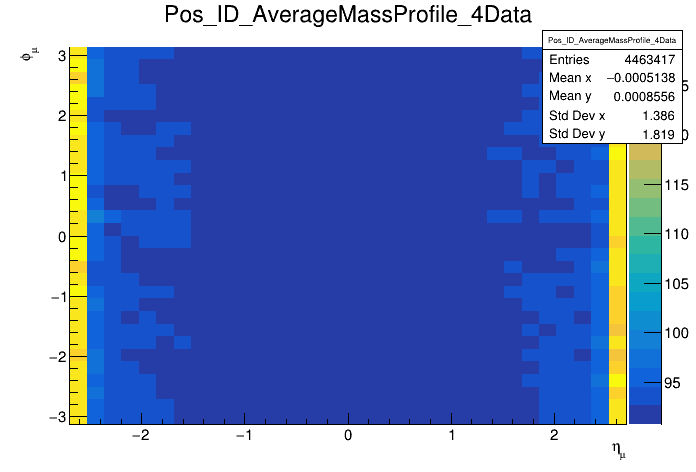

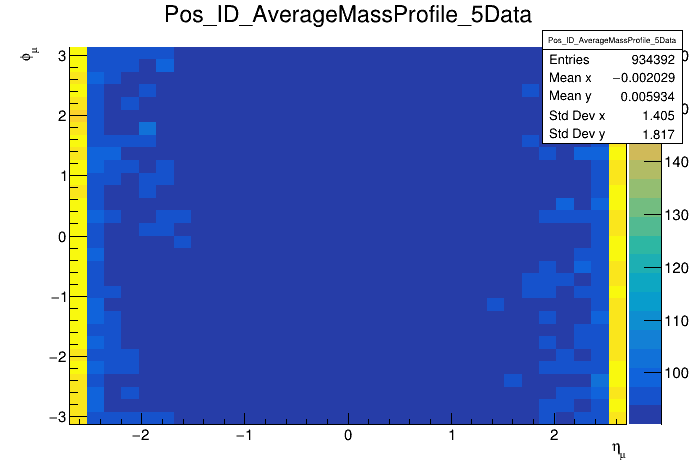

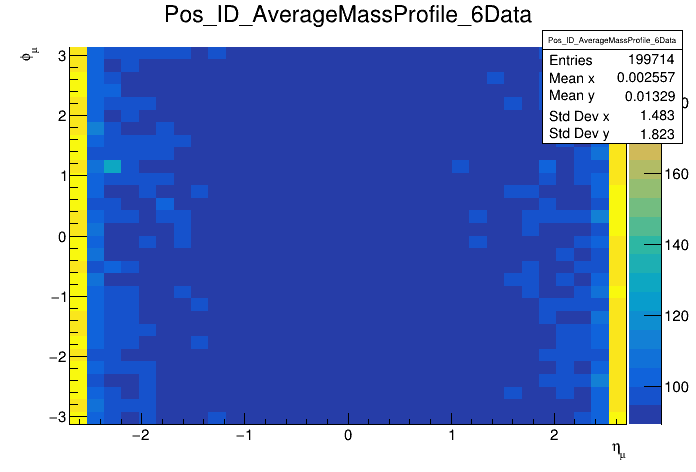

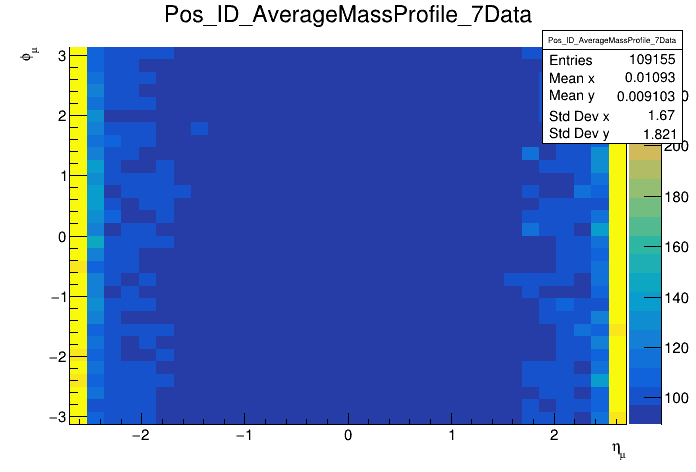

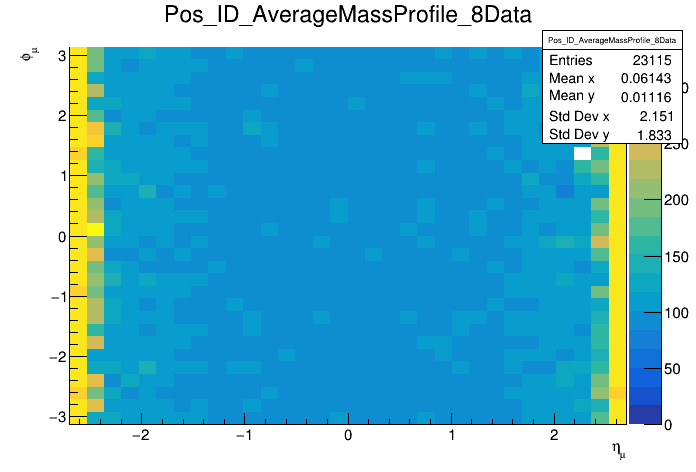

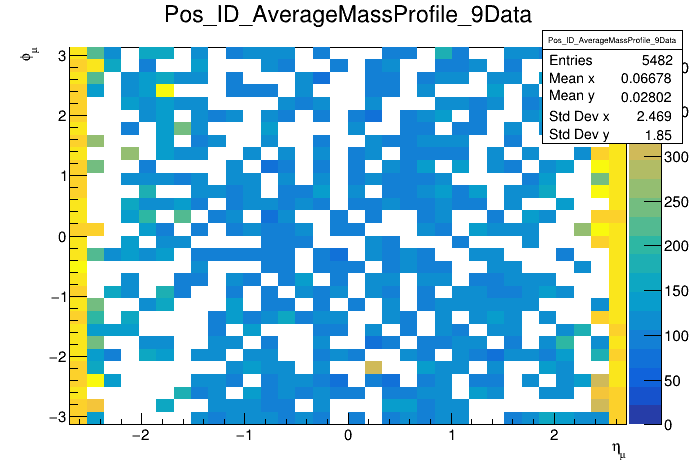

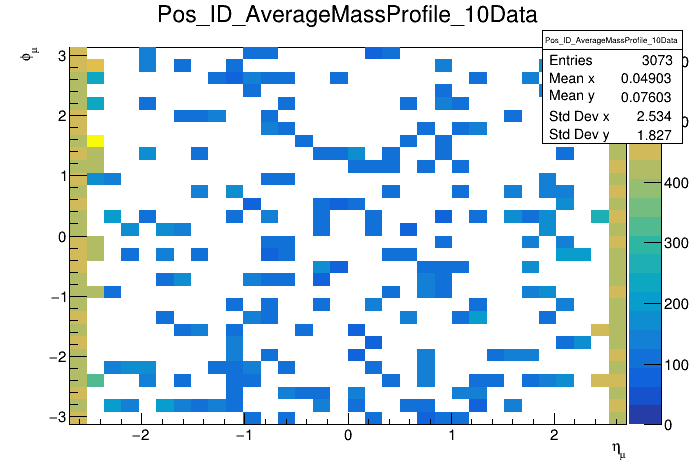

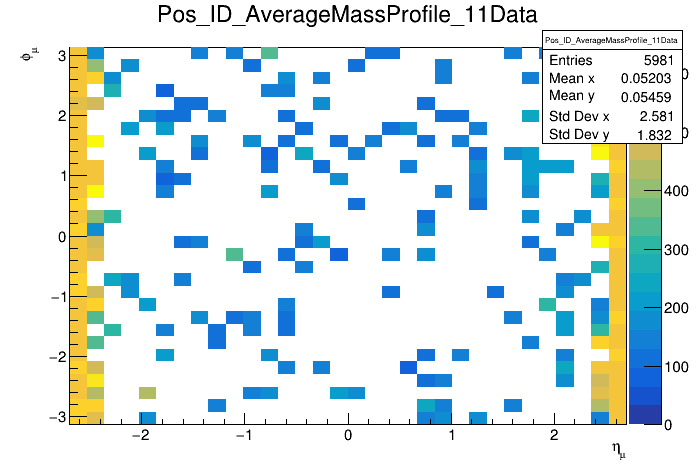

In [17]:
hist_cache = {}
canvases = []
import ROOT
for Pos_histogram, Neg_histogram in zip(Pos_histograms, Neg_histograms):
    h_pos = hm.get_histograms(Pos_histogram)
    hist_cache[Pos_histogram] = h_pos
    h_neg = hm.get_histograms(Neg_histogram)
    hist_cache[Neg_histogram] = h_neg
    canvases.append(ROOT.TCanvas(Pos_histogram + Neg_histogram))
    h_pos["Data"].Draw("COLZ")
    canvases[-1].Draw()